# Gold Price Prediction

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data collection and processing

In [2]:
data=pd.read_csv('gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.shape

(2290, 6)

In [5]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [7]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#for last 5 rows
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
correlation=data.corr()

In [12]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

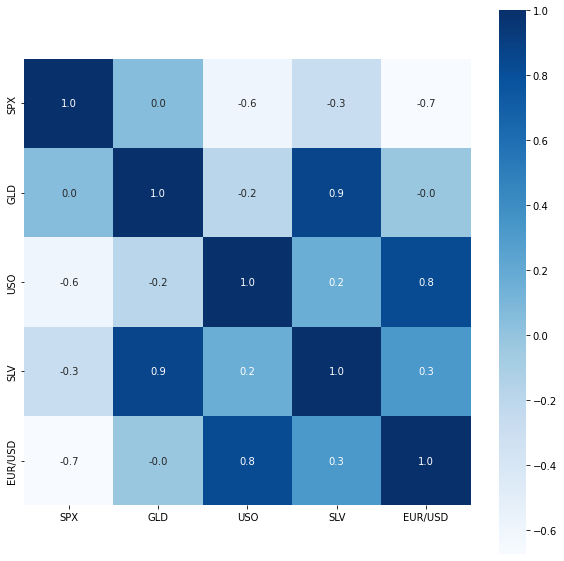

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,fmt='0.1f',square=True, annot=True,annot_kws={'size':10},cmap='Blues')

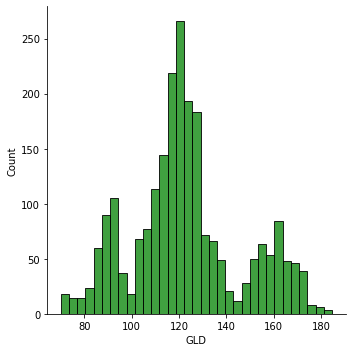

In [15]:
sns.displot(data['GLD'],color='green')

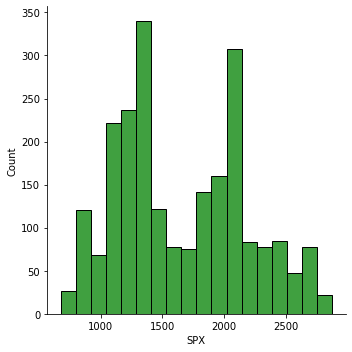

In [16]:
sns.displot(data['SPX'],color='green')

### Splitting the data

In [20]:
x=data.drop(['Date','GLD'],axis=1)

In [21]:
x.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [22]:
y=data['GLD']

In [23]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

### Splitting the data into training and test set

In [24]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
x_test.shape

(458, 4)

In [26]:
x_train.shape

(1832, 4)

In [27]:
y_test.shape

(458,)

In [28]:
y_train.shape

(1832,)

### Model Training

In [29]:
regressor=RandomForestRegressor()

In [30]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

### Model Evaluating

In [31]:
test_data_prediction=regressor.predict(x_test)

In [32]:
test_data_prediction

array([168.62989931,  81.87319983, 116.15970049, 127.57570079,
       120.55830142, 154.839198  , 150.62009791, 126.199     ,
       117.46329869, 126.07850044, 116.54550088, 172.09680087,
       141.91489858, 167.87979841, 115.33160019, 117.64330058,
       139.33370256, 170.24500055, 159.77920248, 159.72099979,
       155.13330057, 125.38760043, 175.56019922, 156.85070331,
       125.21320042,  93.74649986,  77.63020025, 120.73070024,
       119.08809927, 167.35669911,  88.26490045, 125.1281002 ,
        91.03800103, 117.66540025, 121.12259887, 136.01380088,
       115.42880139, 115.2457009 , 147.95379946, 107.50080081,
       104.40600257,  87.24539808, 126.47240067, 118.0698001 ,
       152.64969923, 119.53160027, 108.33389999, 108.01779786,
        93.25660035, 127.20609746,  74.50570062, 113.57299895,
       121.19160057, 111.45969926, 118.98169884, 120.73559955,
       158.72869992, 167.29440123, 146.92719662,  85.99539879,
        94.32740042,  86.80419885,  90.83520008, 119.05

In [34]:
# R square error
error_score=metrics.r2_score(y_test,test_data_prediction)

In [35]:
error_score

0.9895100786364361

In [36]:
#comparing the actual values and predicted values
y_test=list(y_test)

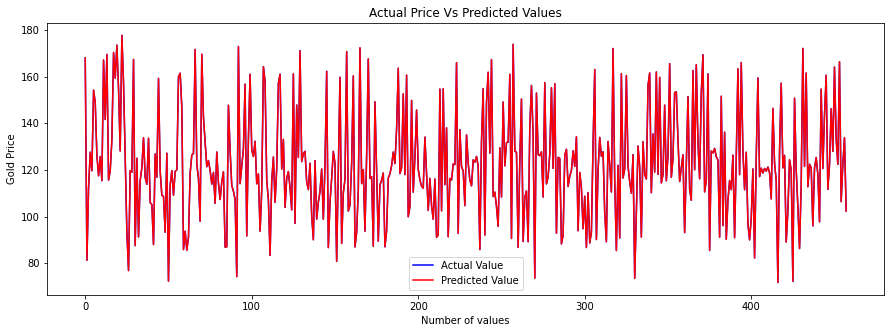

In [43]:
plt.figure(figsize=(15,5))
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(y_test,color='red',label='Predicted Value')
plt.title("Actual Price Vs Predicted Values")
plt.xlabel("Number of values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()